**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import scipy as sc
import numpy as np
import matplotlib as mp
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
Class2Data=pd.read_csv("2Classdata.csv")
Class2Data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
#The given dataset has proportion of normality with the columns 'pelvic_radius' and 'degree_spondylolisthesis'

In [4]:
missing_value=Class2Data.isnull().sum()
missing_value
#no missing values. but have values tending to zero

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
datatype=Class2Data.dtypes
datatype

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [7]:
print("Head::\n", Class2Data.head())
print("Tail::\n", Class2Data.tail())

Head::
    pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  
Tail::
      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
305         47.903565            13.616688              36.000000   
306         53.936748        

In [8]:
pelvic_random=Class2Data.sample(n=20)
pelvic_random

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,Abnormal
204,56.535051,14.377189,44.991547,42.157862,101.723334,25.773174,Abnormal
106,65.013773,9.838262,57.735837,55.175511,94.738525,49.696955,Abnormal
77,58.782548,7.667044,53.338941,51.115504,98.501157,51.584125,Abnormal
47,41.352504,16.577364,30.706191,24.775141,113.266675,-4.497958,Abnormal
149,79.249671,23.944825,40.796698,55.304846,98.622512,36.706395,Abnormal
183,71.001941,37.515772,84.537093,33.486169,125.164232,67.771190,Abnormal
125,48.060626,5.687032,57.057161,42.373594,95.443757,32.835877,Abnormal
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,Normal
65,83.933009,41.286305,62.000000,42.646703,115.012334,26.588100,Abnormal


In [9]:
Class2Data.drop('class', axis=1)
#Class2Data.dtypes()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


# Encode the Class variable to integer.

In [10]:
from sklearn import preprocessing as prep
le=prep.LabelEncoder()
Class2Data['class']=le.fit_transform(Class2Data['class'])#,inplace=True)
#Class2Data['class'].unique()
Class2Data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [11]:
#x(feature set)
Class2Data.corr()['degree_spondylolisthesis'].between(-11,-10)

pelvic_incidence            False
pelvic_tilt numeric         False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
Name: degree_spondylolisthesis, dtype: bool

In [12]:
#y(target set)
Class2Data.corr()['pelvic_radius'].between(70,80)

pelvic_incidence            False
pelvic_tilt numeric         False
lumbar_lordosis_angle       False
sacral_slope                False
pelvic_radius               False
degree_spondylolisthesis    False
class                       False
Name: pelvic_radius, dtype: bool

# Normalize your Data (X) to get values between 0 to 1.

In [13]:
Class2Data.corr()['degree_spondylolisthesis'].between(0,1)

pelvic_incidence             True
pelvic_tilt numeric          True
lumbar_lordosis_angle        True
sacral_slope                 True
pelvic_radius               False
degree_spondylolisthesis     True
class                       False
Name: degree_spondylolisthesis, dtype: bool

# Split the dat as train and test with a ratio of 70:30.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Class2Data=Class2Data.drop(Class2Data['class'], axis=1)
y=Class2Data['class']
x=Class2Data.drop('class',axis=1)
sc=StandardScaler()
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state=2)
Class2Data=Class2Data.dropna()
Class2Data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


# Build the KNN model using Train Dataset and predict the class on test dataset.

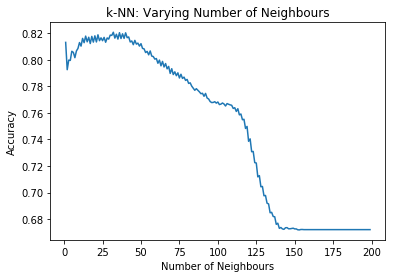

In [17]:
from matplotlib import pyplot as plt
neighbors = np.arange(1, 200)# training accuracy remains nearly same but testing accuracy improves when the number of neighbours are increased
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train=[]
    test=[]
    for j in range(100):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbours')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#if the testing and training ratio is as nearby, the plot is nearly parallel and

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [ ]:
from sklearn.metrics import accuracy_score
knn.score(X_test, y_test)

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
y=Class2Data['class']
x=Class2Data.drop('class',axis=1)
neighbors = np.arange(1,201)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3,random_state=2)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(xTrain)
    scaledX_test = sc.transform(xTest)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,yTrain)
    if ((k+2)%2!=0):
        train_accuracy[(i)] = knn.score(scaledX_train,yTrain)
        test_accuracy[(i)] = knn.score(scaledX_test,yTest)
        if(train_accuracy[(i)]==test_accuracy[(i)]):
            print("********Best Score at k =",(k+2)," Training and Testing accuracy are equal\n")

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [ ]:
Class3Data=pd.read_csv("3Classdata.csv")
Class3Data

In [ ]:
missing_value=Class3Data.isnull().sum()
missing_value

In [ ]:
print("Head::\n", Class3Data.head())
print("Tail::\n", Class3Data.tail())

In [ ]:
pelvic_random=Class3Data.sample(n=20)
pelvic_random

In [ ]:
Class3Data.drop('class', axis=1)

In [ ]:
from sklearn import preprocessing as prep
le=prep.LabelEncoder()
Class2Data['class']=le.fit_transform(Class2Data['class'])#,inplace=True)
#Class2Data['class'].unique()
Class2Data

In [ ]:
#feature set
Class3Data.corr()['degree_spondylolisthesis'].between(-11,-10)

In [ ]:
#y(target set)
Class3Data.corr()['pelvic_radius'].between(70,80)

In [ ]:
Class3Data.corr()['degree_spondylolisthesis'].between(0,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y=Class3Data['class']
x=Class3Data.drop('class',axis=1)
sc=StandardScaler()
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state=2)
Class3Data=Class2Data.dropna()
Class3Data

In [ ]:
from matplotlib import pyplot as plt
neighbors = np.arange(1, 100)# training accuracy remains nearly same but testing accuracy improves when the number of neighbours are increased
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbours')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
knn.score(X_test, y_test)
# observed that as the value of k increased, accuracy gradually reduces and after a point reaches nearly 50% or remains nearly 45%

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
y=Class3Data['class']
x=Class3Data.drop('class',axis=1)
neighbors = np.arange(1,201)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3,random_state=2)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(xTrain)
    scaledX_test = sc.transform(xTest)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,yTrain)
    if ((k+2)%2!=0):
        train_accuracy[(i)] = knn.score(scaledX_train,yTrain)
        test_accuracy[(i)] = knn.score(scaledX_test,yTest)
        if(train_accuracy[(i)]==test_accuracy[(i)]):
            print("********Best Score at k =",(k+2)," Training and Testing accuracy are equal\n")